In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class
)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

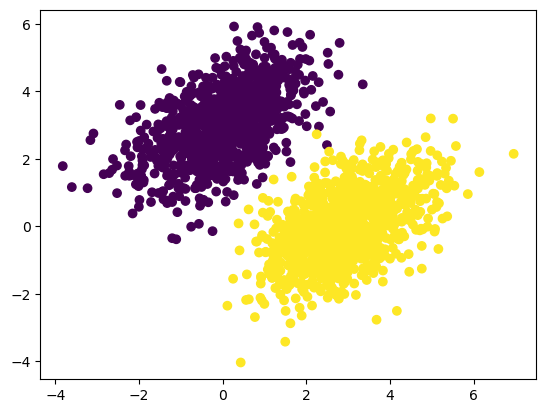

In [4]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [5]:
input_dim = 2 # represents a point (x,y) co-ordinate
output_dim =1 # represent weather point belongs to 0 or 1 (binary classification) [true or false]

W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))
print(inputs)
print(W)

[[ 0.5977093   4.33205   ]
 [-0.8816848   3.2755816 ]
 [-0.33205554  3.608946  ]
 ...
 [ 5.3064666   1.5618206 ]
 [ 2.7615225   0.14658779]
 [ 3.3156757  -0.7785823 ]]
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.30323792],
       [0.09938884]], dtype=float32)>


In [6]:
def model(inputs):
    return tf.matmul(inputs, W) + b #For two matrices to be multiplied, the number of columns in the first matrix must equal the number of rows in the second matrix

In [15]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [18]:
LR = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * LR)
    b.assign_sub(grad_loss_wrt_b * LR)
    return loss

In [19]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.5033
Loss at step 1: 0.0971
Loss at step 2: 0.0727
Loss at step 3: 0.0660
Loss at step 4: 0.0620
Loss at step 5: 0.0586
Loss at step 6: 0.0556
Loss at step 7: 0.0528
Loss at step 8: 0.0503
Loss at step 9: 0.0481
Loss at step 10: 0.0460
Loss at step 11: 0.0441
Loss at step 12: 0.0424
Loss at step 13: 0.0408
Loss at step 14: 0.0394
Loss at step 15: 0.0381
Loss at step 16: 0.0369
Loss at step 17: 0.0358
Loss at step 18: 0.0348
Loss at step 19: 0.0339
Loss at step 20: 0.0331
Loss at step 21: 0.0324
Loss at step 22: 0.0317
Loss at step 23: 0.0311
Loss at step 24: 0.0306
Loss at step 25: 0.0301
Loss at step 26: 0.0296
Loss at step 27: 0.0292
Loss at step 28: 0.0288
Loss at step 29: 0.0285
Loss at step 30: 0.0281
Loss at step 31: 0.0279
Loss at step 32: 0.0276
Loss at step 33: 0.0274
Loss at step 34: 0.0271
Loss at step 35: 0.0269
Loss at step 36: 0.0268
Loss at step 37: 0.0266
Loss at step 38: 0.0265
Loss at step 39: 0.0263


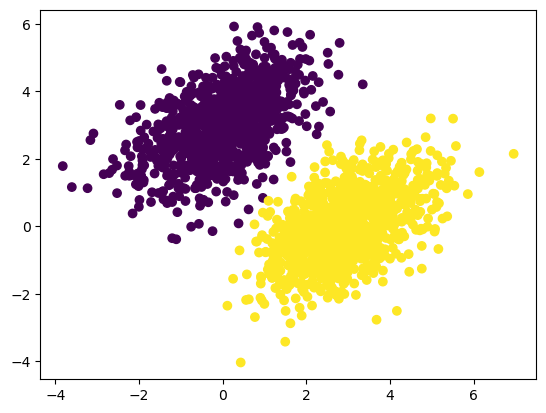

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.16997059],
       [-0.13152215]], dtype=float32)>


In [20]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()
print(W)

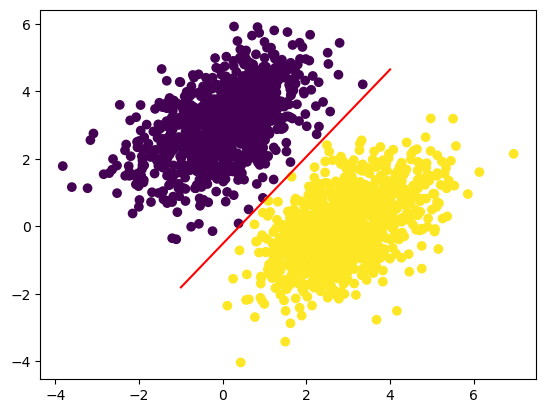

In [21]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)